In [71]:
import numpy as np
import pandas as pd
# from skimage import imread
from matplotlib.image import imread
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import pickle
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,callbacks,metrics,backend
from tensorflow.keras.optimizers import RMSprop
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# sys.path.append(os.path.abspath(r'C:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\ml_alzheimer_class\src'))
sys.path.append(os.path.relpath('../src'))
import utils as ut
import math



In [25]:
metr_class_dict = {'Model':['baseline','model 2','model 3'],
                   'Model type':['XGBoost','Gradient Boost','Neural Network'],
                   'Accuracy':[0.95,0.96,0.92],'Recall':[0.912,0.914,0.92]}
class_df = pd.DataFrame(metr_class_dict)
class_df

,Model,Model type,Accuracy,Recall
0,baseline,XGBoost,0.95,0.912
1,model 2,Gradient Boost,0.96,0.914
2,model 3,Neural Network,0.92,0.920


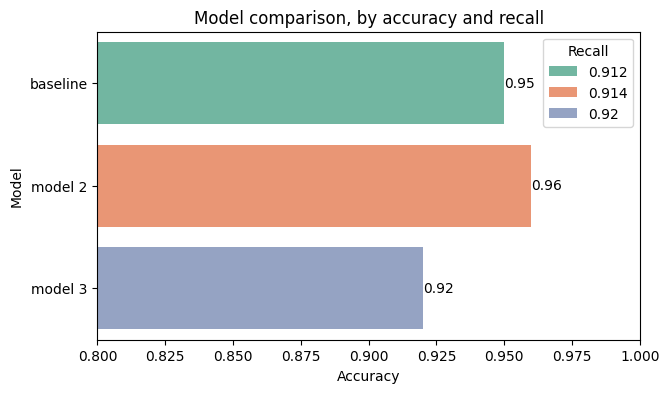

In [ ]:
plt.figure(figsize=[7,4])
barplot = sns.barplot(data=class_df,x='Accuracy',y='Model',hue='Recall',palette='Set2')
plt.xlim([0.8,1])
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')
plt.title('Model comparison, by accuracy and recall')
plt.show()

In [27]:
model_2= pickle.load(open("../models/class/model_2.pkl",'rb'))

In [42]:
class_featnames = model_2[1].feature_names_in_
class_feats = model_2[1].feature_importances_.round(3)
print(class_featnames)
print(class_feats)

['MMSE' 'FunctionalAssessment' 'MemoryComplaints' 'BehavioralProblems'
 'ADL']
[0.273 0.283 0.113 0.083 0.248]


Text(0.5, 1.0, 'Feature Importances of selected model')

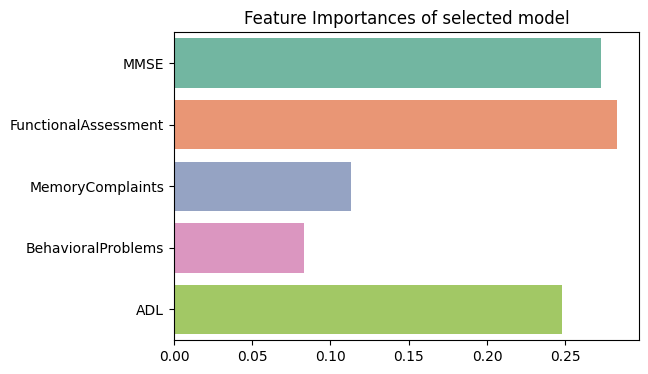

In [89]:
plt.figure(figsize=[6,4])
barplot_2 = sns.barplot(x=class_feats,y=class_featnames,hue=class_featnames,palette='Set2')
plt.title('Feature Importances of selected model')


In [73]:
alz = pd.read_csv('../data/class/raw/alzheimers_disease_data.csv',index_col='PatientID')
alz_2b = alz[['MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL','Diagnosis']] #,'mix'
x1_train, x1_test, y1_train, y1_test = ut.train_test(alz_2b,test_size=.2)
y1_pred = model_2.predict(x1_test)

In [72]:
accuracy_score(y1_test,y1_pred)

0.9651162790697675

In [69]:
corr = confusion_matrix(y1_test,y1_pred,normalize='true').round(2)
print(corr)

[[0.98 0.02]
 [0.06 0.94]]


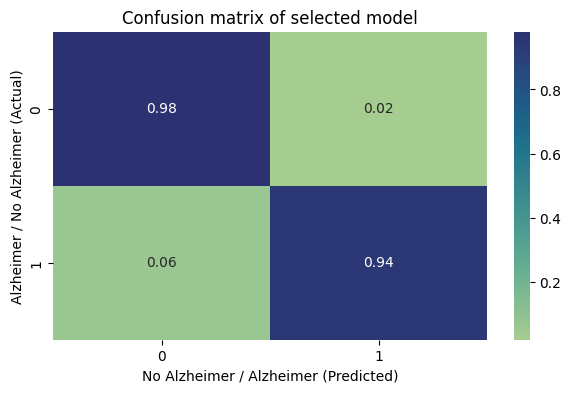

In [87]:
plt.figure(figsize=[7,4])
plt.title('Confusion matrix of selected model')
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True,)
sns.heatmap(corr, annot=True,cmap='crest',cbar=True)
plt.xlabel('No Alzheimer / Alzheimer (Predicted)')
plt.ylabel('Alzheimer / No Alzheimer (Actual)')
plt.show();